# Jordan–Wigner Sanity Check Demo

This notebook demonstrates that the expectation value of $\sigma_z$ on the first qubit of a two–qubit XY chain obtained from a direct wavefunction simulation is reproduced by the correlation–matrix approach derived from the Jordan–Wigner (JW) transformation.  The code used here lives in `jw_sanity_check.py` in the same directory.

We choose as an initial spin configuration |01> (first qubit up, second qubit down) and evolve under the Hamiltonian

$$
H = J(\sigma_x^{(1)}\sigma_x^{(2)} + \sigma_y^{(1)}\sigma_y^{(2)}),
$$

with $J>0$.  We set $J=1$ for concreteness, but feel free to experiment with other values.


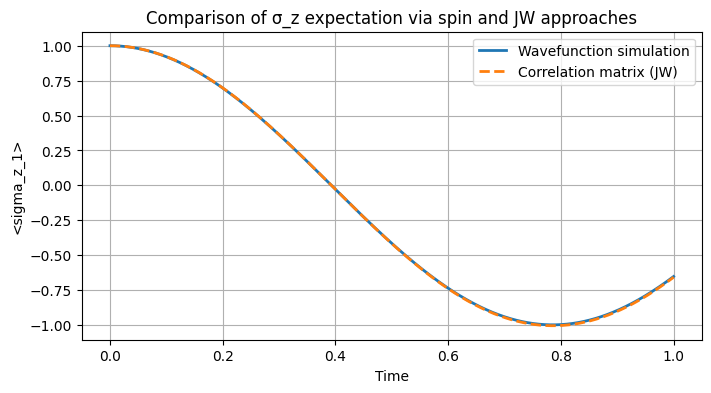

Maximum absolute difference: 6.604e-03


In [3]:
from jw_sanity_check import wavefunction_magnetization, corr_magnetization
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
J = 1.0
T = 1.0
steps = 1000

# Compute magnetization from both methods
times_wave, m_wave = wavefunction_magnetization(J=J, T=T, steps=steps, initial_state='01')
times_corr, m_corr = corr_magnetization(J=J, T=T, steps=steps, L=2, occ=[0,1])

# Ensure the time arrays match
assert np.allclose(times_wave, times_corr)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(times_wave, m_wave, label='Wavefunction simulation', lw=2)
plt.plot(times_corr, m_corr, '--', label='Correlation matrix (JW)', lw=2)
plt.xlabel('Time')
plt.ylabel(r'<sigma_z_1>')
plt.title('Comparison of σ_z expectation via spin and JW approaches')
plt.legend()
plt.grid(True)
plt.show()

# Compute and display the maximum absolute difference between the curves
max_diff = np.max(np.abs(m_wave - m_corr))
print(f"Maximum absolute difference: {max_diff:.3e}")


## Parallel execution example

Although the purely Hamiltonian dynamics considered here contain no randomness, it is sometimes useful to evaluate multiple parameter sets concurrently, for instance to sweep the coupling constant $J$.  The function `simulate_wavefunction_parallel` uses Python's `multiprocessing` to spawn several independent workers.  The following example computes the magnetization for two different couplings in parallel.


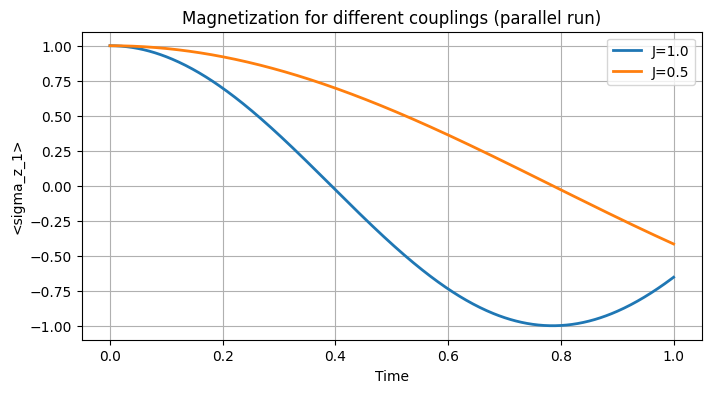

In [4]:
from jw_sanity_check import simulate_wavefunction_parallel

# Define parameter sets: (J, T, steps, initial_state)
params = [
    (1.0, 1.0, 500, '01'),
    (0.5, 1.0, 500, '01'),
]

# Run simulations in parallel (uses all available cores by default)
results = simulate_wavefunction_parallel(params)

# Plot both results on the same axis
plt.figure(figsize=(8, 4))
for J_val, t_arr, m_arr in results:
    plt.plot(t_arr, m_arr, label=f'J={J_val}', lw=2)
plt.xlabel('Time')
plt.ylabel(r'<sigma_z_1>')
plt.title('Magnetization for different couplings (parallel run)')
plt.legend()
plt.grid(True)
plt.show()
